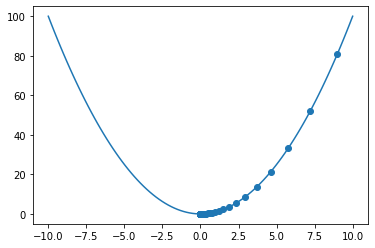

In [1]:
# Gradient Descent Base
# Convex Graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

old_x = 9
alpha = 0.1
loop = 1000
x_list = [old_x]
y_list = [old_x**2]
for i in range(loop):
  new_x = old_x - alpha*2*old_x
  x_list.append(new_x)
  y_list.append(new_x**2)
  old_x = new_x
plt.scatter(x_list,y_list)
plt.show()

In [ ]:
# Linear Regression Gradient Descent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def hypothesis_function(X, theta):
  return X.dot(theta)
def CostFunction(h,y):
  return (1/(2*len(y))) * np.sum((h-y)**2)

# Gradient Descent
# Each Coef
def Gradient_Descent(loop, alpha, X, y, theta):

  theta_list = [theta]
  new_theta= theta
  m = len(y)

  cost = cost_function(hypothesis_function(X, theta), y,g)
  cost_list = [cost]
# Update coef
  for i in loop:
    new_theta[0] = theta[0] - (alpha/m)*(np.dot(theta,X)-y)
    new_theta[1] = theta[1] - (alpha/m)*(np.dot((np.dot(theta,X)-y),X))
    theta = new_theta

    if i % 10== 0:
      theta_list.append(theta.tolist())
      cost = cost_function(hypothesis_function(X, theta), y)
      cost_list.append(cost)

  return theta, theta_list, cost_list


In [ ]:
# Mini-Batch Stochastic Grandient

import numpy as np

def SGD(x, y, b, w, learning_rate=0.01, epoch=1000, batch_size=16):
  # one coef, one intercept
  if type(w) != np.ndarray:
    w = float(w)
    w = np.reshape(w, (1, 1))
  if x.size == x.shape[0]:
    x = x.reshape(x.shape[0], 1)
  if y.size == y.shape[0]:
    y = y.reshape(y.shape[0], 1)

# epoch loop
  for epochs in range(epoch):
    batch_mask = np.random.choice(x.shape[0], batch_size)
    x_batch = x[batch_mask]
    y_batch = y[batch_mask]
    pred = x_batch.dot(w) + b
    dw = ((pred - y_batch) * x_batch).mean(0)
    dw = dw.reshape(dw.shape[0], 1)
    db = (pred - y_batch).mean()
    w -= dw * learning_rate
    b -= db * learning_rate
    if epochs % (epoch / 10) == 0:
      pred = x.dot(w) + b
      err = np.mean(np.square(pred - y))
      print("error : ", err)
  return w, b